<a href="https://colab.research.google.com/github/Aashi-sharma/Light-dark-theme/blob/master/Algorithm_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt


In [ ]:
file_name=input('Enter your file name : ')
df=pd.read_csv(file_name)

Enter your file name : BAJFINANCE.csv


In [ ]:
# replacing date column to Sno
if df.columns.any() == 'Date' and df.columns.any() !='Sno':
  df.insert(0, 'Sno', np.arange(len(df)))
  dates = df['Date']
  del df['Date']

In [ ]:
  #replacing junk values by nan 
junk_values=('*','?','#','+','-')
for i in range(0,len(df.columns)):
   for j in range(0,len(df.index)):
     if type(df.iloc[j,i])==str:
        s=df.iloc[j,i].startswith(junk_values)
        if  s==True:
           df=df.replace(df.iloc[j,i],np.nan)
print(df.head(10))
print(df.columns)
       

   Sno      Symbol Series  Prev Close   Open   High   Low   Last  Close  \
0    0  BAJAUTOFIN     EQ       46.95  49.45  50.75  46.5  50.75  50.75   
1    1  BAJAUTOFIN     EQ       50.75  53.20  53.20  47.9  48.00  48.10   
2    2  BAJAUTOFIN     EQ       48.10  46.55  47.40  44.6  44.60  44.60   
3    3  BAJAUTOFIN     EQ       44.60  43.50  46.00  42.1  46.00  45.25   
4    4  BAJAUTOFIN     EQ       45.25  48.00  48.00  42.0  42.90  42.90   
5    5  BAJAUTOFIN     EQ       42.90  42.05  44.90  41.0  43.00  42.90   
6    6  BAJAUTOFIN     EQ       42.90  42.00  42.00  39.5  40.25  40.10   
7    7  BAJAUTOFIN     EQ       40.10  40.00  40.00  39.0  39.00  39.00   
8    8  BAJAUTOFIN     EQ       39.00  40.00  41.00  38.5  39.50  39.50   
9    9  BAJAUTOFIN     EQ       39.50  39.00  40.50  39.0  39.90  39.90   

    VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  50.05    7600  3.803800e+10     NaN                 NaN          NaN  
1  48.56    5000  2.428000

In [ ]:
#select nan values columns
nan_columns=df.columns[df.isnull().any()]
print(nan_columns)

Index(['Trades', 'Deliverable Volume', '%Deliverble'], dtype='object')


In [ ]:
#filling missing values in data
from sklearn.impute import SimpleImputer
op = int(input("Do you want to fill nan values with...\n1. Mean\n2. Median\nEnter 1 or 2: "))
if op==1:
  imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Mean..")
elif op==2:
  imputer=SimpleImputer(missing_values=np.nan,strategy='median')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Median..")
print(df)
  

Do you want to fill nan values with...
1. Mean
2. Median
Enter 1 or 2: 1
Nan values are filled with Mean..
       Sno      Symbol Series  Prev Close     Open     High      Low     Last  \
0        0  BAJAUTOFIN     EQ       46.95    49.45    50.75    46.50    50.75   
1        1  BAJAUTOFIN     EQ       50.75    53.20    53.20    47.90    48.00   
2        2  BAJAUTOFIN     EQ       48.10    46.55    47.40    44.60    44.60   
3        3  BAJAUTOFIN     EQ       44.60    43.50    46.00    42.10    46.00   
4        4  BAJAUTOFIN     EQ       45.25    48.00    48.00    42.00    42.90   
...    ...         ...    ...         ...      ...      ...      ...      ...   
5230  5230  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00  4744.00   
5231  5231  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55  4886.00   
5232  5232  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00  5255.00   
5233  5233  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00  5475.00   
52

In [ ]:
# checking classification datatype string in each column
for i in range(len(df.columns)):
  if df.iloc[:, i].dtype == np.object:
    unique = np.unique(df.iloc[:, i])
    df.replace(unique, np.arange(len(unique)), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


KFold

In [ ]:
from  sklearn.model_selection import KFold
def kfold(X,Y,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=5)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=(r2_score(Y_test,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score


def kfold_(X,Y,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)
  

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=5)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    acc=(r2_score(Y_train,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_train,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score
  




Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
def train_test(X,Y,model):
  #size=float(input("Enter size of test data: \n"))

  Y=np.array(Y).astype(int)#cast pandas  object to integer
  Y=np.ravel(Y)#change a 2 dimensional or multi-dimensional array into a flattened array
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=10)
  regressor=model
  regressor.fit(X_train,Y_train)
  Y_pred_test=regressor.predict(X_test)
  Y_pred_train=regressor.predict(X_train)

  return Y_pred_test,Y_test,Y_train,Y_pred_train
  

Accuracy Function

In [ ]:
from sklearn.metrics import r2_score
def accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  r_testing=(r2_score(Y_test,Y_pred_test))*100
  r_training=(r2_score(Y_train,Y_pred_train))*100
  print("Accuracy of training:",r_training)
  print("Accuracy of testing:",r_testing)
  return r_training,r_testing

Error Function

In [ ]:
from sklearn import metrics
def error_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  rmse_training=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
  rmse_testing=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
  print('Root Mean Squared Error of training:',np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))
  print('Root Mean Squared Error of testing:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
  return rmse_training,rmse_testing


In [ ]:

print("what you want to predict"+str(list(df)))
choice=str(input('Enter your choice:'))
Y=df.loc[:,choice]
df_X=df.drop(choice,axis=1)
X=df_X[list(df_X)]



what you want to predict['Sno', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
Enter your choice:High


In [ ]:
Algorithm=['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression']
Kfold_accuracy=[]
Kfold_error=[]
testing_accuracy=[]
testing_error=[]
training_accuracy=[]
training_error=[]

Scaling Data

In [ ]:
Y_r=np.array(Y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit_transform(X)
sc_Y=StandardScaler().fit_transform(Y_r)

SVR

In [ ]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
rmse_svr_Kfold,accuracy_svr_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_svr,r_testing_svr=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_svr,rmse_testing_svr=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_svr_Kfold)
Kfold_error.append(rmse_svr_Kfold)
testing_accuracy.append(r_testing_svr)
testing_error.append(rmse_testing_svr)
training_accuracy.append(r_training_svr)
training_error.append(rmse_training_svr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 95.64456242060048
Accuracy of testing: 94.80419284345191
Root Mean Squared Error of training: 0.1390011806502049
Root Mean Squared Error of testing: 0.14566643123792317


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
rmse_random_Kfold,accuracy_random_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_random,r_testing_random=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_random,rmse_testing_random=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_random_Kfold)
Kfold_error.append(rmse_random_Kfold)
testing_accuracy.append(r_testing_random)
testing_error.append(rmse_testing_random)
training_accuracy.append(r_training_random)
training_error.append(rmse_training_random)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 99.9970871369156
Accuracy of testing: 99.9780060266904
Root Mean Squared Error of training: 10.192307951369296
Root Mean Squared Error of testing: 27.47670725827319


Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rmse_multiple_Kfold,accuracy_multiple_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_multiple,r_testing_multiple=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_multiple,rmse_testing_multiple=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_multiple_Kfold)
Kfold_error.append(rmse_multiple_Kfold)
testing_accuracy.append(r_testing_multiple)
testing_error.append(rmse_testing_multiple)
training_accuracy.append(r_training_multiple)
training_error.append(rmse_training_multiple)

Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 99.99485991957346
Accuracy of testing: 99.99451760147635
Root Mean Squared Error of training: 13.539338878475155
Root Mean Squared Error of testing: 13.718231921395907


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
rmse_knn_Kfold,accuracy_knn_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_knn,r_testing_knn=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_knn,rmse_testing_knn=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_knn_Kfold)
Kfold_error.append(rmse_knn_Kfold)
testing_accuracy.append(r_testing_knn)
testing_error.append(rmse_testing_knn)
training_accuracy.append(r_training_knn)
training_error.append(rmse_training_knn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 97.47754627635665
Accuracy of testing: 95.9474234598205
Root Mean Squared Error of training: 0.10578258992801097
Root Mean Squared Error of testing: 0.12864667960401516


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
rmse_logistic_Kfold,accuracy_logistic_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_logistic,r_testing_logistic=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_logistic,rmse_testing_logistic=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_logistic_Kfold)
Kfold_error.append(rmse_logistic_Kfold)
testing_accuracy.append(r_testing_logistic)
testing_error.append(rmse_testing_logistic)
training_accuracy.append(r_training_logistic)
training_error.append(rmse_training_logistic)

Average RMSE using KFold :inf
Average accuracy using KFold :inf
Accuracy of training: 81.66606805742148
Accuracy of testing: 84.72490381009264
Root Mean Squared Error of training: 0.2851874431479367
Root Mean Squared Error of testing: 0.24976118447024984


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size, :],df1[training_size:len(df1), :1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
t_step=int(input("Enter the time steps"))
time_step=t_step
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

Enter the time steps100


In [ ]:
print(X_train)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.58012390e-15
  4.56305512e-15 4.58012390e-15]
 [0.00000000e+00 0.00000000e+00 5.34252962e-15 ... 4.56305512e-15
  4.58012390e-15 6.25855440e-13]
 [0.00000000e+00 5.34252962e-15 5.62700937e-15 ... 4.58012390e-15
  6.25855440e-13 2.51923883e-06]
 ...
 [1.13791898e-16 0.00000000e+00 1.05798017e-13 ... 1.19179945e-13
  1.19802386e-13 1.02763074e-10]
 [0.00000000e+00 1.05798017e-13 1.05963016e-13 ... 1.19802386e-13
  1.02763074e-10 1.08191376e-02]
 [1.05798017e-13 1.05963016e-13 1.14474650e-13 ... 1.02763074e-10
  1.08191376e-02 3.16295960e-12]]


In [ ]:
print(X_test.shape),print(Y_test.shape)

(15604, 100)
(15604,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_train.shape[1],1)
print(Y_train)

[6.25855440e-13 2.51923883e-06 6.42049181e-12 ... 1.08191376e-02
 3.16295960e-12 4.35384871e-11]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(100, activation='tanh', recurrent_activation='hard_sigmoid',input_shape=(t_step,1)))
model.add(Dense(50 ))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')
history=model.fit(X_train,Y_train,batch_size=100,epochs=11,shuffle=False)
print(history)

Epoch 1/11
628/628 [==============================] - 134s 205ms/step - loss: 2.6634e-05
Epoch 2/11
628/628 [==============================] - 127s 202ms/step - loss: 3.0932e-06
Epoch 3/11
628/628 [==============================] - 126s 201ms/step - loss: 2.0042e-06
Epoch 4/11
628/628 [==============================] - 127s 202ms/step - loss: 1.9942e-06
Epoch 5/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9997e-06
Epoch 6/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9992e-06
Epoch 7/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9939e-06
Epoch 8/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9956e-06
Epoch 9/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9934e-06
Epoch 10/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9912e-06
Epoch 11/11
628/628 [==============================] - 126s 201ms/step - loss: 1.9888e-06


In [ ]:
import math
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],-1))
score_train=model.evaluate(X_train,Y_train,batch_size=1)
score_test=model.evaluate(X_test,Y_test,batch_size=1)
print("in train MSE=",round(score_train,4))
print("in test MSE=",score_test)
rmse_train = math. sqrt(score_train)
rmse_test = math. sqrt(score_test)
print("Train RMSE",round(rmse_train,4))
print("test RMSE",rmse_test)

15604/15604 [==============================] - 121s 8ms/step - loss: 0.0016
in train MSE= 0.0
in test MSE= 0.001554357004351914
Train RMSE 0.0019
test RMSE 0.039425334549651116


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 48,451
Trainable params: 48,451
Non-trai

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape)
print(test_predict.shape)
train_predict=train_predict.reshape(-1,1)
test_predict=test_predict.reshape(-1,1)
print(train_predict.shape)
print(test_predict.shape)


(62719, 1)
(15604, 1)
(62719, 1)
(15604, 1)


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)


(62719, 1)
(15604, 1)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(Y_train.shape)
print(train_predict.shape)

(62719,)
(62719, 1)


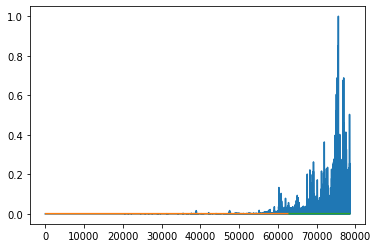

In [ ]:
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
X_input=test_data[947 :].reshape(1,-1)
X_input.shape

(1, 14758)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<3):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,n_steps,1))
    yhat=model.predict(X_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,n_steps,1))
    yhat=model.predict(X_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

0 day input [1.51001849e-13 1.51906494e-13 1.53038724e-13 ... 2.65952149e-11
 1.00889035e-10 2.44538789e-17]


ValueError: ignored

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,104)

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,test_predict)
print(r2)
MAPE_value=np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print(MAPE_value)

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5135:]))
print(day_pred),print(lst_output)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
plt.plot(test_predict,label="predictions",c='g')
y_test=scaler.inverse_transform(np.array(Y_test).reshape((len(Y_test),1)))
plt.plot([row[0]for row in y_test],label='actual',c='r')
plt.figure(figsize=(10,5))
plt.plot(test_predict,label="predicted",c="g")
plt.plot([row[0]for row in y_test],label="actual",c='r')
plt.legend()
plt.show()

In [ ]:
df_table=pd.DataFrame({'Algorithm':['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression'],'KFold_Accuracy':Kfold_accuracy,'KFold Error':Kfold_error,'Training_Accuracy':training_accuracy,
                        'Traning Error':training_error,'Testing_Accuracy':testing_accuracy,'Testing Error':testing_error})
print(df_table)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(Algorithm,Kfold_accuracy,color='m',linewidth=2,label='KFold Accuracy')
plt.plot(Algorithm,Kfold_error,color='green',linewidth=2,label='KFold Error')
plt.plot(Algorithm,training_accuracy,color='blue',linewidth=2,label='Training Accuracy')
plt.plot(Algorithm,testing_accuracy,color='purple',linewidth=2,label='Testing Accuracy')
plt.plot(Algorithm,training_error,color='red',linewidth=2,label='Training Error')
plt.plot(Algorithm,testing_error,color='orange',linewidth=2,label='Testing Error')
plt.legend()

In [ ]:
print("Sort your list by"+str(list(df_table)))
s=str(input('Enter your choice:'))#Enter string
sorted_df=df_table.sort_values(s,ascending=False,axis=0)
print(sorted_df)


In [ ]:
best_algo=sorted_df.loc[0,'Algorithm']
print('Best algorithm for your dataset is',best_algo)